In [1]:
# import the required libraries
import tensorflow as tf
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
# examine data
df.head()

,label,x1,x2
0,1,2.6487,4.5192
1,1,1.5438,2.4443
2,1,1.8990,4.2409
3,1,2.4711,5.8097
4,1,3.3590,6.4423


In [3]:
df[df['label'] == 0]['x1']

9     7.5417
10    7.2063
11    6.5355
12    5.4503
13    5.8449
14    4.8979
15    5.8055
16    7.3641
17    6.2592
18    8.3703
19    8.5676
20    8.1676
Name: x1, dtype: float64

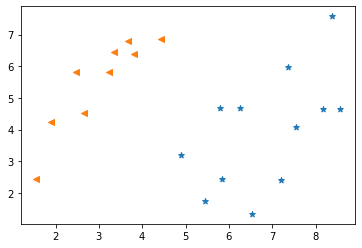

In [4]:
# visualize the data using matplotlib
plt.scatter(df[df['label'] == 0]['x1'], df[df['label'] == 0]['x2'], marker='*')
plt.scatter(df[df['label'] == 1]['x1'], df[df['label'] == 1]['x2'], marker='<')

In [5]:
# prepare the data into features and labels
X_input = df[['x1', 'x2']].values
y_label = df[['label']].values

In [6]:
# create TensforFlow variables for features and labels and typecast them to float
x = tf.Variable(X_input, dtype=tf.float32)
y = tf.Variable(y_label, dtype=tf.float32)

2022-05-14 10:39:57.043042: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# training of the perceptron
number_of_features = 2
number_of_units = 1
learning_rate = 0.01
# weights and bias
weight = tf.Variable(tf.zeros([number_of_features, number_of_units]), dtype=tf.float32)
bias = tf.Variable(tf.zeros([number_of_units]))
#optimizer
optimizer = tf.optimizers.SGD(learning_rate)
def perceptron(x):
    z = tf.add(tf.matmul(x, weight), bias)
    output = tf.sigmoid(z)
    return output

def train(i):
    for n in range(i):
        loss = lambda:abs(tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_label, logits=perceptron(x))))
        optimizer.minimize(loss, [weight, bias])
        
train(1000)

InvalidArgumentError: cannot compute Mul as input #1(zero-based) was expected to be a float tensor but is a int64 tensor [Op:Mul]